# Titanic - Machine Learning from Disaster
- Dataset được lấy tại một cuộc thi trên trang web Kaggle
- Sự kiện đắm tàu Titannic vào ngày 15-04-1912 đã rất nổi tiếng với chúng ta. Trong sự kiện đó, bởi vì không có đủ thuyền cứu hộ cho tất cả những hành khách và nhân viên trên tàu Titanic nên đã có 1502 người thiệt mạng trên tổng số 2224 người trên tàu. Mặc dù có một số yếu tố may mắn liên quan đến việc sống sót, nhưng có vẻ như một số nhóm người có khả năng sống sót cao hơn những nhóm khác. 
- Sau đây chúng ta sẽ xây dựng một mô hình machine learning để dự đoán xem khả năng sống sót của những người đi trên chuyến tàu Titanic

In [3]:
import pandas as pd
import numpy as np

## Load dataset

In [4]:
train_set = pd.read_csv("train.csv", index_col = "PassengerId")
test_set = pd.read_csv("test.csv", index_col = "PassengerId")

In [5]:
train_set.head(10)
sex={'male':0,'female':1}

In [6]:
test_set.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Take a quick look at the data
Ta có:
- Numeric data: Age, Fare
- Categorical Data: Survived, Pclass, Sex, SibSp, Parch, Embarked.

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [17]:
train_set_1 = train_set.copy()
test_set_1 = test_set.copy()

In [18]:
temp = ["Pclass","Sex","SibSp","Parch","Embarked"] 
for feature in temp:
    train_set_1[feature] = train_set_1[feature].astype("category")
    test_set_1[feature] = test_set_1[feature].astype("category")
train_set_1["Survived"] = train_set_1["Survived"].astype("category")

In [19]:
train_set_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [20]:
train_set_1.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [21]:
train_set_1.describe(include = "category")

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## Discover and Visualize the Data to Gain Insights

### Categorical Data

In [22]:
train_set_1["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [23]:
train_set_1["Survived"].value_counts(normalize = True).to_frame()

,Survived
0,0.616162
1,0.383838


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='Survived', ylabel='count'>

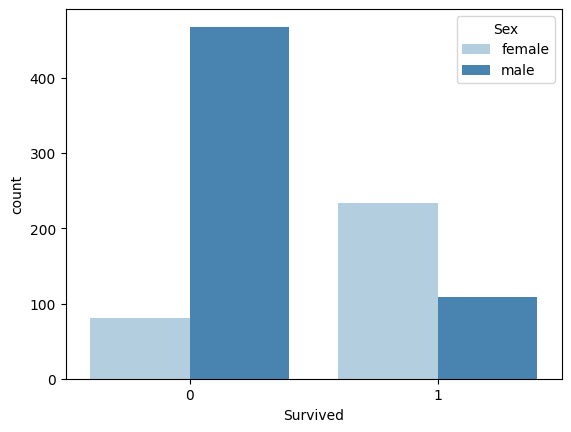

In [25]:
sns.countplot(data = train_set_1,x = "Survived" , hue = "Sex", palette = "Blues")
# Dễ thấy rắng trong những người sống sót số lượng nữ nhiều hơn nam

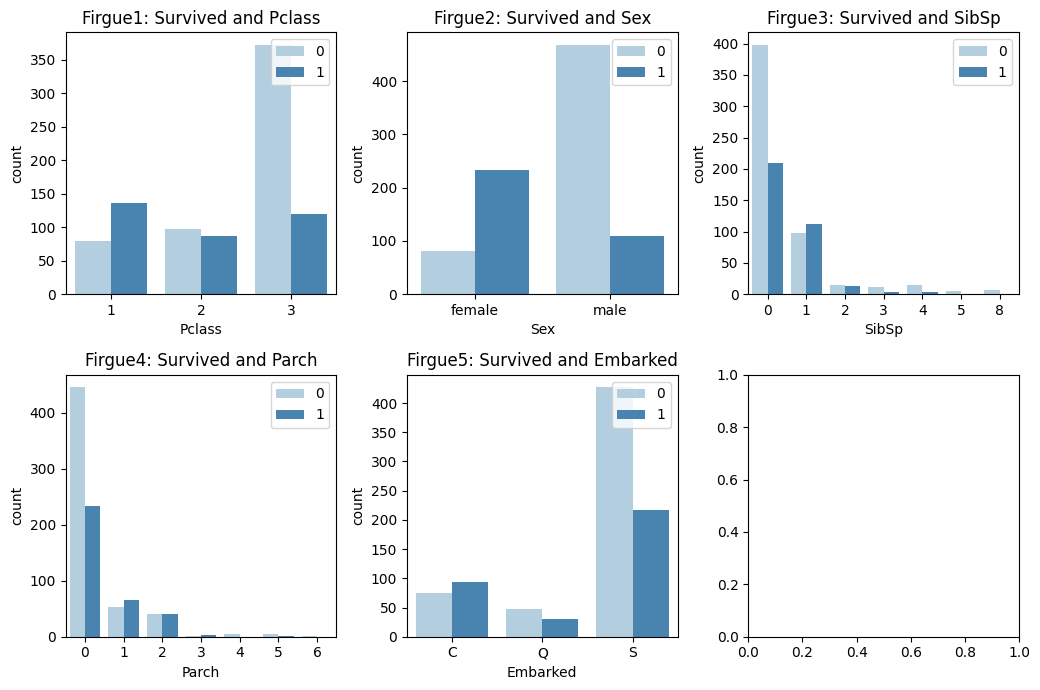

In [27]:
temp = ["Pclass","Sex","SibSp","Parch","Embarked"] 
n_cols = 3
n_rows = 2
fig, ax = plt.subplots( n_rows, n_cols, figsize = (n_cols * 3.5, n_rows * 3.5))
for r in range (0, n_rows):
    for c in range (0, n_cols):
        i = r * n_cols + c
        if i < len(temp):
            ax_i = ax[r,c];
            sns.countplot(data = train_set_1, x = temp[i],hue = "Survived" , palette = "Blues",ax = ax_i)
            ax_i.set_title(f"Firgue{i+1}: Survived and {temp[i]}")
            ax_i.legend(title = '', loc = 'upper right')
plt.tight_layout()

- Pclass: Những người ở hạng thương gia (1) có tỉ lệ sống cao hơn những người ở các hạng khác
- Parch và Sibsp: những người đi fu lịch một mình không có gia đình, con cái, bố mẹ có khả năng tử vong cao
- Những người ở bến Southampton có khả năng tử vong nhiều hơn (những cũng có thể là do số lượng người lên từ bến Southampton nhiều hơn)

### Numberic Feature


<AxesSubplot: xlabel='Age', ylabel='Count'>

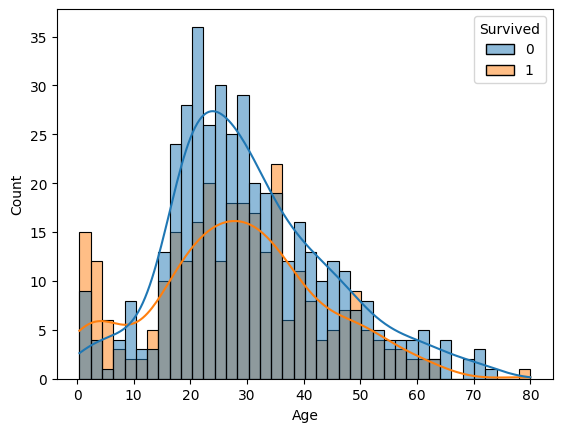

In [167]:
sns.histplot(data = train_set_1, x = "Age", hue = "Survived", bins = 40, kde = True)

- Trẻ em (0-15 tuổi) và người già (>=75 tuổi) thường được ưu tiên lên tàu cứu hộ

<AxesSubplot: xlabel='Fare', ylabel='Count'>

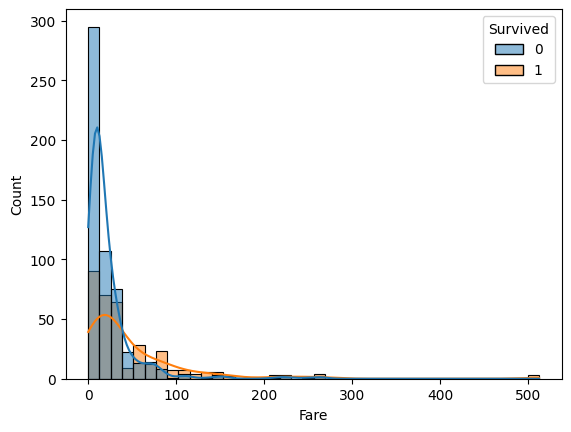

In [31]:
sns.histplot(data = train_set_1, x = "Fare", hue = "Survived", bins = 40, kde = True)

<AxesSubplot: xlabel='Fare', ylabel='count'>

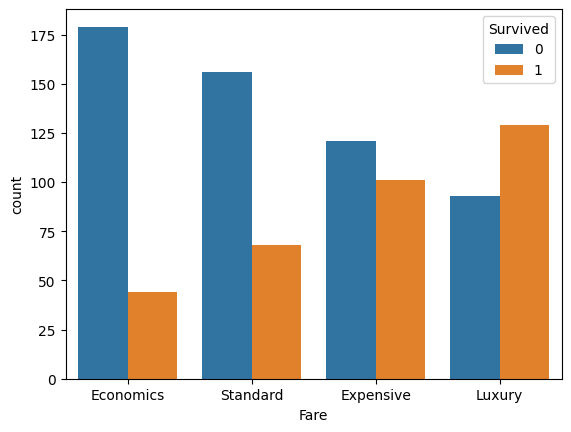

In [32]:
fare_set = pd.qcut(train_set_1["Fare"],4, labels = ['Economics','Standard','Expensive','Luxury'])

sns.countplot(x = fare_set, hue = train_set_1['Survived'])

- Những người giàu có tỉ lệ sống sót cao hơn (gần giống với Pclass)

## Prepare Data

In [103]:
# Tách x, label, test_set
y_train = train_set["Survived"].copy()
x_train = train_set.drop("Survived",axis = 1)
x_test = test_set.copy()

### Handle Categorical Attribute and Missing Values

In [104]:
sex={'male':0,'female':1}
x_train=x_train.replace({'Sex':sex})
x_test=x_test.replace({'Sex':sex})

In [106]:
x_train.Embarked.fillna(x_train.Embarked.dropna().max(), inplace=True)
embark = {'S':0,'C':1,'Q':2}
x_train = x_train.replace({'Embarked':embark})
x_test = x_test.replace({'Embarked':embark})
x_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0
888,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0


In [107]:
median = x_train["Age"].median()
x_train["Age"].fillna(median, inplace=True)
median = x_test["Age"].median()
x_test["Age"].fillna(median, inplace=True)

In [108]:
x_train.Fare = pd.qcut(train_set["Fare"],4, labels = [0,1,2,3])
x_test.Fare = pd.qcut(test_set["Fare"],4, labels = [0,1,2,3])

In [109]:
x_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0,NaN,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,3,C85,1
3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,1,NaN,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3,C123,0
5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,1,NaN,0
888,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,2,B42,0
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,2,NaN,0


### Drop unnescessary feature

In [110]:
x_train.drop("Cabin", axis=1,inplace = True)
x_test.drop("Cabin", axis=1,inplace = True)

In [111]:
x_train.drop(["Name","Ticket"], axis=1,inplace = True)
x_test.drop(["Name","Ticket"], axis=1,inplace = True)

In [112]:
x_train


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.0,1,0,0,0
2,1,1,38.0,1,0,3,1
3,3,1,26.0,0,0,1,0
4,1,1,35.0,1,0,3,0
5,3,0,35.0,0,0,1,0
...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,1,0
888,1,1,19.0,0,0,2,0
889,3,1,28.0,1,2,2,0


In [113]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    891 non-null    int64   
 1   Sex       891 non-null    int64   
 2   Age       891 non-null    float64 
 3   SibSp     891 non-null    int64   
 4   Parch     891 non-null    int64   
 5   Fare      891 non-null    category
 6   Embarked  891 non-null    int64   
dtypes: category(1), float64(1), int64(5)
memory usage: 82.1 KB


### Combine feature

In [114]:
x_train["Size_of_family"] = x_train["SibSp"] + x_train["Parch"]
x_test["Size_of_family"] = x_test["SibSp"] + x_test["Parch"]
x_train.drop(["SibSp","Parch"], axis=1,inplace = True)
x_test.drop(["SibSp","Parch"], axis=1,inplace = True)
x_train

,Pclass,Sex,Age,Fare,Embarked,Size_of_family
PassengerId,,,,,,
1,3,0,22.0,0,0,1
2,1,1,38.0,3,1,1
3,3,1,26.0,1,0,0
4,1,1,35.0,3,0,1
5,3,0,35.0,1,0,0
...,...,...,...,...,...,...
887,2,0,27.0,1,0,0
888,1,1,19.0,2,0,0
889,3,1,28.0,2,0,3


## Training and Evaluate

### Using Stochastic Gradient Descent Classifier

In [164]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Pclass          891 non-null    int64   
 1   Sex             891 non-null    int64   
 2   Age             891 non-null    float64 
 3   Fare            891 non-null    category
 4   Embarked        891 non-null    int64   
 5   Size_of_family  891 non-null    int64   
dtypes: category(1), float64(1), int64(4)
memory usage: 75.1 KB


In [165]:
exam = x_train[:1]
exam_y = y_train[1]
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)


SGDClassifier(random_state=42)

In [166]:
y_predict = sgd_clf.predict(x_train)
sum(y_predict == y_train)

535

In [167]:
exam_y

0

#### Measuring Accuracy Using Cross-Validation

In [168]:
from sklearn.model_selection import cross_val_score
cv_sgd = cross_val_score(sgd_clf, x_train, y_train, cv=5, scoring="accuracy")
cv_sgd

array([0.70391061, 0.75280899, 0.80337079, 0.79213483, 0.82022472])

#### Using Precision

In [129]:
from sklearn.model_selection import cross_val_predict
y_train_pred_sgd = cross_val_predict(sgd_clf, x_train, y_train, cv=5)

In [130]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred_sgd)

0.7456445993031359

### Using DecisionTreeClassifier

In [131]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

- Predict 1 instance

In [135]:
sgd_clf.predict(exam)

array([0], dtype=int64)

- How model fit training set

In [137]:
y_predict_tree = tree_clf.predict(x_train)

In [139]:
sum(y_predict_tree == y_train)

749

#### Measuring Accuracy Using Cross-Validation

In [160]:
from sklearn.model_selection import cross_val_score
cv_tree = cross_val_score(tree_clf, x_train, y_train, cv=5, scoring="accuracy")
cv_tree

array([0.76536313, 0.78089888, 0.80898876, 0.78651685, 0.85393258])

#### Using Precision

In [161]:
from sklearn.model_selection import cross_val_predict
y_train_pred_tree = cross_val_predict(tree_clf, x_train, y_train, cv=5)

In [162]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred_tree)

0.7820069204152249

### Using Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 2000)
lr.fit(x_train,y_train)


LogisticRegression(max_iter=2000)

- Predict 1 instance

In [146]:
lr.predict(exam)

array([0], dtype=int64)

- How model fit training set

In [147]:
y_predict_lr = lr.predict(x_train)

In [148]:
sum(y_predict_lr == y_train)

713

#### Measuring Accuracy Using Cross-Validation

In [150]:
cv_lr = cross_val_score(lr,x_train,y_train,cv=5,scoring="accuracy")
cv_lr.mean()

0.78788525516289

#### Using Precision

In [159]:
from sklearn.model_selection import cross_val_predict
y_train_pred_lr = cross_val_predict(lr, x_train, y_train, cv=5)

In [163]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred_lr)

0.7820069204152249

### Support Vector Classification

In [153]:
from sklearn.svm import SVC
svc = SVC(probability = True)
svc.fit(x_train,y_train)

SVC(probability=True)

- Predict 1 instance

In [154]:
svc.predict(exam)

array([0], dtype=int64)

- How model fit training set

In [155]:
y_predict_svc = svc.predict(x_train)

In [156]:
sum(y_predict_svc == y_train)

615

#### Measuring Accuracy Using Cross-Validation

In [152]:
cv_svc = cross_val_score(svc,x_train,y_train,cv=5,scoring="accuracy")
cv_svc

array([0.63687151, 0.63483146, 0.64044944, 0.64606742, 0.64606742])

#### Using Precision

In [158]:
from sklearn.model_selection import cross_val_predict
y_train_pred_svc = cross_val_predict(svc, x_train, y_train, cv=5)

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred_svc)